In [111]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [112]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('twittertraining.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)




,target,ids,date,flag,user,text
1254814,4,1997161132,Mon Jun 01 16:21:42 PDT 2009,NO_QUERY,amandaballoch,goodnight! TOMORROW &lt;3 x
230930,0,1978853942,Sun May 31 00:41:58 PDT 2009,NO_QUERY,poshbaby7,i love twitter! But only there's a limit (bored)
506874,0,2188763521,Mon Jun 15 22:30:56 PDT 2009,NO_QUERY,kerpathy,"@scuttling Yeah idk, I'm hoping most of them j..."
1389925,4,2053174366,Sat Jun 06 03:33:56 PDT 2009,NO_QUERY,MalissaA,is studying studying studying.... had the most...
1550303,4,2183745729,Mon Jun 15 14:55:47 PDT 2009,NO_QUERY,justinveesmiles,im watching rat race and eating cookies!


In [113]:
df.head() #first five records of data

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [114]:
df.columns #for columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [115]:
df.shape

(1600000, 6)

In [116]:
np.sum(df.isnull().any(axis=1))
#checking for null values

0

In [117]:
df['target'].unique()

array([0, 4])

In [118]:
df['target'].nunique()

2

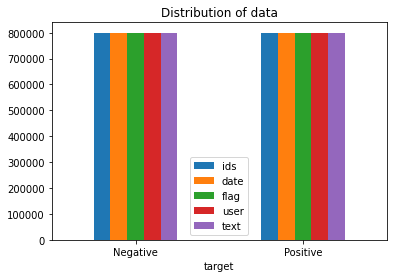

In [119]:
# plotting the distribution of dataset
ax=df.groupby('target').count().plot(kind='bar', title='Distribution of data')
ax.set_xticklabels(['Negative','Positive'],rotation=0)
# storing data in lists
text,sentiment=list(df['text']), list(df['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

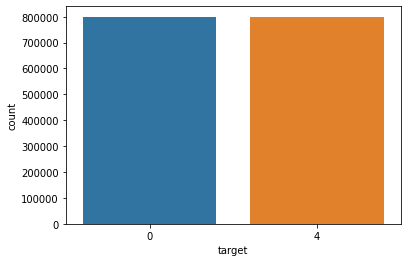

In [120]:
import seaborn as sns
sns.countplot(x='target', data=df)

In [121]:

data = df.drop(['ids','date','flag','user'],axis=1)
 # selecting the text and target column for our further analysis


In [122]:

data['target'] = data['target'].replace(4,1)
 # replacing value 4 by value 1 for positive sentiment


In [123]:
data['target'].unique()
 #find out the unique values in target column of dataset data


array([0, 1])

In [124]:
data['target'].dtype
#find out the data type of target column of dataset data

dtype('int64')

In [125]:
data['text']=data['text'].str.lower()
data['text'].head()

0    @switchfoot http://twitpic.com/2y1zl - awww, t...
1    is upset that he can't update his facebook by ...
2    @kenichan i dived many times for the ball. man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object

In [126]:
data['text'].head

<bound method NDFrame.head of 0          @switchfoot http://twitpic.com/2y1zl - awww, t...
1          is upset that he can't update his facebook by ...
2          @kenichan i dived many times for the ball. man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    just woke up. having no school is the best fee...
1599996    thewdb.com - very cool to hear old walt interv...
1599997    are you ready for your mojo makeover? ask me f...
1599998    happy 38th birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @thenspcc @sparkscharity...
Name: text, Length: 1600000, dtype: object>

In [127]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [128]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

0    @switchfoot http://twitpic.com/2y1zl - awww, t...
1    upset can't update facebook texting it... migh...
2    @kenichan dived many times ball. managed save ...
3                     whole body feels itchy like fire
4    @nationwideclass no, it's not behaving all. i'...
Name: text, dtype: object

In [132]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data2=data
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].tail()

1599995                  woke up no school best feeling ever
1599996    thewdbcom  cool hear old walt interviews â« h...
1599997                      ready mojo makeover ask details
1599998    happy 38th birthday boo alll time tupac amaru ...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

In [133]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
data['text'].tail()

1599995                  woke up no school best feeling ever
1599996    thewdbcom  cool hear old walt interviews â« h...
1599997                      ready mojo makeover ask details
1599998    happy 38th birthday boo alll time tupac amaru ...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

In [134]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(http?://[^s]+)|(https?://[^s]+))','',data)
data['text']=data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].head()

0    switchfoot httptwitpiccom21zl  as bummer shoul...
1    upset cant update facebook texting it might cr...
2    kenichan dived many times ball managed save 50...
3                     whole body feels itchy like fire
4    nationwideclass no its not behaving all im mad...
Name: text, dtype: object

In [135]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].tail()

1599995                  woke up no school best feeling ever
1599996    thewdbcom  cool hear old walt interviews â« h...
1599997                      ready mojo makeover ask details
1599998    happy th birthday boo alll time tupac amaru sh...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

In [136]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+')
data['text'] = data['text'].apply(tokenizer.tokenize)
data['text'].head()
#the r in the guide is wrong!!

0    [switchfoot, httptwitpiccomzl, as, bummer, sho...
1    [upset, cant, update, facebook, texting, it, m...
2    [kenichan, dived, many, times, ball, managed, ...
3              [whole, body, feels, itchy, like, fire]
4    [nationwideclass, no, its, not, behaving, all,...
Name: text, dtype: object

In [137]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
data['text']= data['text'].apply(lambda x: stemming_on_text(x))
data['text'].head()

0    [switchfoot, httptwitpiccomzl, as, bummer, sho...
1    [upset, cant, update, facebook, texting, it, m...
2    [kenichan, dived, many, times, ball, managed, ...
3              [whole, body, feels, itchy, like, fire]
4    [nationwideclass, no, its, not, behaving, all,...
Name: text, dtype: object

In [138]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
import nltk
nltk.download('stopwords')
stopwords1=stopwords.words('english')
stopwords1[:3]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/naickercreason/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my']

In [139]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
data['text']= data['text'].apply(lambda x: stemming_on_text(x))
data['text'].head()

0    [switchfoot, httptwitpiccomzl, as, bummer, sho...
1    [upset, cant, update, facebook, texting, it, m...
2    [kenichan, dived, many, times, ball, managed, ...
3              [whole, body, feels, itchy, like, fire]
4    [nationwideclass, no, its, not, behaving, all,...
Name: text, dtype: object

In [140]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
data['text'] = data['text'].apply(lambda x: lemmatizer_on_text(x))
data['text'].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/naickercreason/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/naickercreason/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0    [switchfoot, httptwitpiccomzl, as, bummer, sho...
1    [upset, cant, update, facebook, texting, it, m...
2    [kenichan, dived, many, times, ball, managed, ...
3              [whole, body, feels, itchy, like, fire]
4    [nationwideclass, no, its, not, behaving, all,...
Name: text, dtype: object

In [141]:
X=data.text
y=data.target

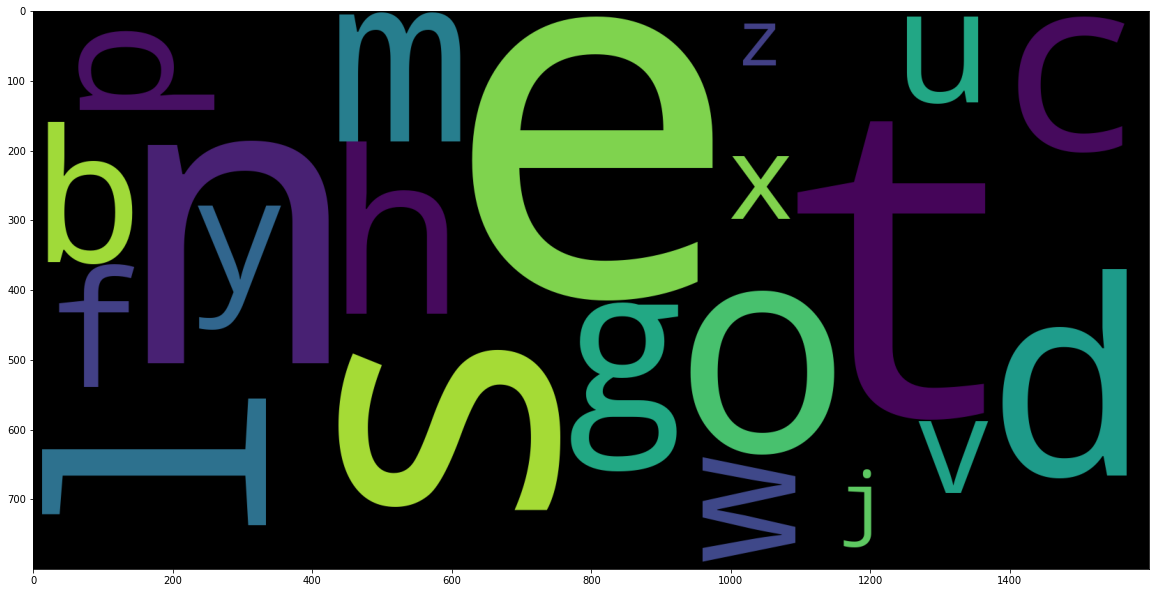

In [146]:
data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(str(data_neg)))
plt.imshow(wc)

In [147]:
data_pos = data['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

TypeError: sequence item 0: expected str instance, list found

In [148]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [149]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

AttributeError: 'list' object has no attribute 'lower'